In [ ]:
!pip install NRCLex
!pip install torch
!pip install stanza

In [ ]:
import stanza
stanza.download('en')
import nltk
nltk.download('punkt')
from bs4 import BeautifulSoup
from nrclex import NRCLex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

2022-04-02 14:06:40 INFO: Downloading default packages for language: en (English)...
2022-04-02 14:06:43 INFO: File exists: /root/stanza_resources/en/default.zip.
2022-04-02 14:07:03 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


####**1. pdf - html (online)**
####**2. html - json (this function)** 

In [ ]:
def get_character_dictionary_from_html(filename, name_position, dialogue_position, scenario_position):
  """
  This function takes the name of the file, the starting position of the name, dialogue,
  and scenario. Then, returns the dictionary.

    Parameters:
      filename: string: The path of the file to read
      name_position: float: The starting value of left pixel for name of character
      dialogue_position: float: The starting value of left pixel for dialogues
      scenario_position: float: The starting value of left pixel for scenarios

    Returns:
      character_dialogues: dict: A dictionary with every character's dialogues,
                               : The sample format is "Name": list of dialogues
      scenarios: dict: A list of scenarios, with the key "scenarios". It is kept
                      as a dict because we can further classify it into different
                      kinds of scenarios if we want
  """
  with open(filename) as fp:
      soup = BeautifulSoup(fp, "html.parser")

  everything = soup.find_all('div')
  character_dialogues = {}
  scenarios = {'scenarios': []} 
  dialogue = "" 
  dialogue_ready = False
  for div in everything:
    try:
      if float(div['style'].split(';')[1].split(':')[1].split('px')[0]) >= name_position-5 \
       and float(div['style'].split(';')[1].split(':')[1].split('px')[0]) <= name_position+5:
        if dialogue_ready:  # For the first dialogue
          if not character_dialogues.get(character):
            character_dialogues[character] = []
          character_dialogues[character].append(dialogue)
          dialogue = ""
        character = div.text  # Character updated
      if float(div['style'].split(';')[1].split(':')[1].split('px')[0]) >= dialogue_position-5 \
       and float(div['style'].split(';')[1].split(':')[1].split('px')[0]) <= dialogue_position+5:
        dialogue = dialogue + " " + div.text
        dialogue_ready = True
      if float(div['style'].split(';')[1].split(':')[1].split('px')[0]) >= scenario_position-5 \
       and float(div['style'].split(';')[1].split(':')[1].split('px')[0]) <= scenario_position+5:
        scenarios['scenarios'].append(div.text)
    except:
      pass
    
  if not character_dialogues.get(character):
    character_dialogues[character] = []
  character_dialogues[character].append(dialogue)
  dialogue = ""

  return character_dialogues, scenarios

In [ ]:
def get_character_dictionary_from_text(filename, name_position, dialogue_position, scenario_position):
  """
  This function converts a text file inot a character dictionary.

    Parameters:
      filename: string: The path of the file to read
      name_position: int: Number of spaces before the name
      dialogue_position: int: Number of spaces before the dialogues
      scenario_position: int: Number of spaces before the scenarios

    Returns:
      character_dialogues: dict: A dictionary with every character's dialogues,
                               : The sample format is "Name": list of dialogues
      scenarios: dict: A list of scenarios, with the key "scenarios". It is kept
                      as a dict because we can further classify it into different
                      kinds of scenarios if we want
  """
  # Filtering the empty lines
  lines = list(filter(lambda x: x!='', open(filename).read().split('\n')))
  character_dialogues = {}
  scenarios = {'scenarios': []} 
  dialogue = "" 
  dialogue_ready = False
  for line in lines:  # for every line
    line_arr = line.split(":") 
    if len(line_arr) == 1:
      scenarios['scenarios'].append(line_arr[0])
    elif len(line_arr) == 2:
      character = line_arr[0]
      dialogue = line_arr[1]
      # If some random line is classified as a dialogue, skip it; 
      if len(character) >= 30:
        continue
      if not character_dialogues.get(character):
          character_dialogues[character] = []
      character_dialogues[character].append(dialogue)
  return character_dialogues, scenarios

In [ ]:
"""
Should we write like a driver function?
"""
character_dialogues, scenarios = get_character_dictionary_from_html("titanic.html", 230, 162, 90)
import json
with open('titanic.json', 'w') as fp:
    json.dump(character_dialogues, fp)

with open('titanic_scenarios.json', 'w') as fp:
    json.dump(scenarios, fp)

####**3. json - csv**

In [ ]:
#choose just json file (not scenario)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving titanic.json to titanic (1).json
User uploaded file "titanic.json" with length 63220 bytes


In [ ]:
import json
from textblob import TextBlob
import regex
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
with open('titanic.json') as fp:
    titanic=json.load(fp)

In [ ]:
#Get Top Characters 

for k in titanic.keys():
  if(len(titanic[k]) > 1):
    print(k + " " + str(len(titanic[k])))

ANATOLY 3
BODINE 25
LOVETT 45
LOVETT (CONT'D) 9
LOVETT (V.O.) 3
(MORE) 12
BODINE (CONT'D) 3
LOVETT (cont'd) 2
BUELL 8
ROSE 213
LIZZY 13
ROSE (CONT'D) 5
CAL 90
RUTH 29
PORTER 2
CAL (CONT'D) 2
LOVEJOY 18
MAN 6
OLD ROSE (V.O.) 13
JACK 182
FABRIZIO 15
PUBKEEPER 2
MOODY 5
ROWE 3
TRUDY 2
WOMAN 5
SMITH 27
ISMAY 14
ANDREWS 25
MOLLY 28
CAL (cont'd) 2
TOMMY 11
GRACIE 7
MASTER AT ARMS 4
COLONEL GRACIE 3
OLD ROSE 6
BROCK 8
MARVIN 2
STEWARD 12
SIR COSMO 2
GUGGENHEIM 2
BRIDE 5
LIGHTOLLER 17
FLEET 9
PHILLIPS 3
EVANS 2
LEE 3
MURDOCH 12
BELL 2
BARRETT 2
STEWARD BARNES 4
HUTCHINSON 2
STEWARD #2 5
HARTLEY 3
LOWE 7
HITCHINS 5
HUSBAND 2
JOUGHIN 2
FATHER BYLES 3


In [ ]:
import pandas as pd

df_titanic = pd.DataFrame(columns=['character', 'text','number'])

In [ ]:
for key, value in titanic.items():
  if(len(titanic[key])>=2): 
    if '(' in key:
      key = key.partition("(")[0].strip()
    for row in value:
      new_row = {'character':key, 'text':row, 'number':1}
      df_titanic = df_titanic.append(new_row, ignore_index=True)

In [ ]:
df_titanic['character'] = df_titanic['character'].astype('string')
df_titanic['text'] = df_titanic['text'].astype('string')

In [ ]:
df_titanic['character'] = df_titanic['character'].str.replace("(cont'd)", "")
df_titanic['character'] = df_titanic['character'].str.replace("(CONT'D)", "") 
df_titanic['character'] = df_titanic['character'].str.replace("(V.O.)", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_titanic['is_character'] = df_titanic['character'].str.isupper()
df_titanic = df_titanic.drop(df_titanic[df_titanic.is_character == False].index)

In [ ]:
import re
def characters_modified(characters):
  characters_list=[]
  for i in range(len(characters)):
    if (('(' in characters[i])==True):
      r = re.compile("(.?)\s\(")
      character_match = r.match(characters[i])
      if not character_match:
        continue
      characters_list.append(character_match.group(1))
    else:
      characters_list.append(characters[i])
  zip_iterator = zip(characters,characters_list)
  characters_dictionary = dict(zip_iterator)
  return characters_dictionary

characters_modified(list(df_titanic.character.unique()))

{'ANATOLY': 'ANATOLY',
 'ANDREWS': 'ANDREWS',
 'BARRETT': 'BARRETT',
 'BELL': 'BELL',
 'BODINE': 'BODINE',
 'BRIDE': 'BRIDE',
 'BROCK': 'BROCK',
 'BUELL': 'BUELL',
 'CAL': 'CAL',
 'COLONEL GRACIE': 'COLONEL GRACIE',
 'EVANS': 'EVANS',
 'FABRIZIO': 'FABRIZIO',
 'FATHER BYLES': 'FATHER BYLES',
 'FLEET': 'FLEET',
 'GRACIE': 'GRACIE',
 'GUGGENHEIM': 'GUGGENHEIM',
 'HARTLEY': 'HARTLEY',
 'HITCHINS': 'HITCHINS',
 'HUSBAND': 'HUSBAND',
 'HUTCHINSON': 'HUTCHINSON',
 'ISMAY': 'ISMAY',
 'JACK': 'JACK',
 'JOUGHIN': 'JOUGHIN',
 'LEE': 'LEE',
 'LIGHTOLLER': 'LIGHTOLLER',
 'LIZZY': 'LIZZY',
 'LOVEJOY': 'LOVEJOY',
 'LOVETT': 'LOVETT',
 'LOWE': 'LOWE',
 'MAN': 'MAN',
 'MARVIN': 'MARVIN',
 'MASTER AT ARMS': 'MASTER AT ARMS',
 'MOLLY': 'MOLLY',
 'MOODY': 'MOODY',
 'MURDOCH': 'MURDOCH',
 'OLD ROSE': 'OLD ROSE',
 'PHILLIPS': 'PHILLIPS',
 'PORTER': 'PORTER',
 'PUBKEEPER': 'PUBKEEPER',
 'ROSE': 'ROSE',
 'ROWE': 'ROWE',
 'RUTH': 'RUTH',
 'SIR COSMO': 'SIR COSMO',
 'SMITH': 'SMITH',
 'STEWARD': 'STEWARD',
 'S

In [ ]:
characters_list = list(df_titanic.character.unique())

In [ ]:
len(characters_list)

50

####**HERE WE HAVE PANDAS DF, THEN WE HAVE TO ADD GENDER MANUALLY**

In [ ]:
df = pd.DataFrame(columns=['character', 'text','number','types'])

In [ ]:
df = df.append(df_titanic.loc[df_titanic.character=='ANATOLY'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='BODINE'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='LOVETT'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='CAMERAMAN'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='BUELL'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='ROSE'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='LIZZY'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='CAL'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='RUTH'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='PORTER'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='LOVEJOY'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='MAN'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='OLD ROSE'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='JACK'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='FABRIZIO'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='PUBKEEPER'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='MOODY'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='ROWE'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='TRUDY'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='WOMAN'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='SMITH'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='ISMAY'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='ANDREWS'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='MOLLY'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='TOMMY'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='GRACIE'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='MASTER AT ARMS'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='COLONEL GRACIE'].assign(types = 'male')) # COLONEL GRACIE = GRACIE
df = df.append(df_titanic.loc[df_titanic.character=='BROCK'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='MARVIN'].assign(types = 'male')) #two characters: DANIEL AND MARY MARVIN = family name
df = df.append(df_titanic.loc[df_titanic.character=='STEWARD'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='SIR COSMO'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='GUGGENHEIM'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='BRIDE'].assign(types = 'male')) # name: HAROLD BRIDE, not description
df = df.append(df_titanic.loc[df_titanic.character=='LIGHTOLLER'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='FLEET'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='PHILLIPS'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='EVANS'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='LEE'].assign(types = 'female'))
df = df.append(df_titanic.loc[df_titanic.character=='MURDOCH'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='BELL'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='BARRETT'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='STEWARD BARNES'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='HUTCHINSON'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='STEWARD #2'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='HARTLEY'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='LOWE'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='HITCHINS'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='HUSBAND'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='JOUGHIN'].assign(types = 'male'))
df = df.append(df_titanic.loc[df_titanic.character=='FATHER BYLES'].assign(types = 'male'))


In [ ]:
len(df.character.unique())

50

####**DB to CSV**

In [ ]:
df.to_csv('titanic_db.csv')

In [ ]:
def get_sentiments(dialogues):
  """
  Takes a list of dialogues spoken by a character and classify it into
  positive, negative, or neutral sentiment

    Parameters:
      dialogues: list: List of dialogues to be setimentized

    Returns:
      sentiment_count: Count of each sentiment in the dialogues.
  """
  emotions = ['Negative', 'Neutral', 'Positive']
  nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')
  doc = nlp(". ".join(dialogues))
  sentiment = [i.sentiment for i in doc.sentences]
  sentiment_count = np.unique(sentiment, return_counts=True)
  
  # Getting the right name for the emotion instead of numeric number
  sentiment_count = dict(zip(map(lambda x: emotions[x], sentiment_count[0]),
                             sentiment_count[1]))
  return sentiment_count

In [ ]:
movies = ['titanic']  # A list of movies data bases we are going to work with

data_frames = {}
character_sentiments = {}
genders = {}  # A dict of dict

# Reading the files for all the movies
for movie in movies:
  data_frames[movie] = pd.read_csv(movie+'_db.csv').drop('Unnamed: 0', axis=1)

# Running Stanza on the characters
for movie in movies:
  df = data_frames[movie]  # for convinience
  for character in df.character.unique():
    if not character_sentiments.get(movie):
      character_sentiments[movie] = {}
      genders[movie] = dict(data_frames[movie].groupby('character')['types'].agg('unique').apply(lambda x: x[0]).fillna('NA'))
    character_sentiments[movie][character] = get_sentiments(df[df.character==character]['text'])

2022-04-02 14:08:58 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-04-02 14:08:59 INFO: Use device: cpu
2022-04-02 14:08:59 INFO: Loading: tokenize
2022-04-02 14:08:59 INFO: Loading: sentiment
2022-04-02 14:09:00 INFO: Done loading processors!
2022-04-02 14:09:00 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-04-02 14:09:00 INFO: Use device: cpu
2022-04-02 14:09:00 INFO: Loading: tokenize
2022-04-02 14:09:00 INFO: Loading: sentiment
2022-04-02 14:09:01 INFO: Done loading processors!
2022-04-02 14:09:02 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-04-02 14:09:02 INFO: Use device: cpu
2022-04-02 14:09:02 INFO: Loading: tokenize
2022-04-02 14:09:02 IN

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
def func(x):
  """
  A functıon to apply NRCLEX on a dıalogue. It also computes new emotıons ıncludıng,
  anxıety, prıde, envy, domınance, and curıosıty. Thıs ıs a functıon that ıs only
  used to apply on a serıes on dıalogue

    Parameters:
      x: str: A strıng, preferably dıalogue, on whıch we have to run NRCLEX
    
    Returns:
      res: dıct: wıth emotıons, havıng 1 ıf the emotıon ıs present, 0 otherwıse
  """
  xx = 'NA'
  res = NRCLex(x).affect_frequencies
  del res['negative']
  del res['positive']
  total = sum(res.values())
  if total != 0:
    for keys in res.keys():
      res[keys] = res[keys]/total
  if res.get('anticipation') and res.get('fear'):
    res['anxiety'] = res['fear']*res['anticipation']
  if res.get('anger'):
    if res.get('joy'):
      res['pride'] = res['anger']*res['joy']
    if res.get('sadness'):
      res['envy'] = res['anger']*res['sadness']
    if res.get('trust'):
      res['dominance'] = res['anger']*res['trust']
  if res.get('surprise') and res.get('trust'):
    res['curiosity'] = res['surprise']*res['trust']
  
  for key in res.keys():
    if res[key] > 0:
      res[key] = 1 
  return res

for movie in movies:
  df = data_frames[movie]
  df['emotions'] = df['text'].apply(func)

In [ ]:
df

,character,text,number,types,is_character,emotions
0,ANATOLY,We are here.,1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,ANATOLY,Do you see it? I don't see it... there!,1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,ANATOLY,Is estealing from the dead.,1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,BODINE,Come left a little. She's right in front F...,1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,BODINE,"You are so full of shit, boss.",1,male,True,"{'fear': 0.0, 'anger': 1, 'anticip': 0.0, 'tru..."
...,...,...,...,...,...,...
939,JOUGHIN,"Sorry, miss!",1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
940,JOUGHIN,Helluva night. Looking down a hundred feet to...,1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
941,FATHER BYLES,...and I saw new heavens and a new earth.,1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
942,FATHER BYLES,"I also saw a new Jerusalem, the holy city c...",1,male,True,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [ ]:
df_all = pd.DataFrame()

for movie in movies:
  df = data_frames[movie]
  df2 = pd.concat([df.drop(['emotions'], axis = 1), df['emotions'].apply(pd.Series)], axis = 1).fillna(0)
  df2['movie'] = movie
  df_all = pd.concat([df_all, df2], ignore_index=True)
  

In [ ]:
df_all

,character,text,number,types,is_character,fear,anger,anticip,trust,surprise,sadness,disgust,joy,anticipation,pride,anxiety,curiosity,envy,dominance,movie
0,ANATOLY,We are here.,1,male,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
1,ANATOLY,Do you see it? I don't see it... there!,1,male,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
2,ANATOLY,Is estealing from the dead.,1,male,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
3,BODINE,Come left a little. She's right in front F...,1,male,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
4,BODINE,"You are so full of shit, boss.",1,male,True,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,JOUGHIN,"Sorry, miss!",1,male,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
940,JOUGHIN,Helluva night. Looking down a hundred feet to...,1,male,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
941,FATHER BYLES,...and I saw new heavens and a new earth.,1,male,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,titanic
942,FATHER BYLES,"I also saw a new Jerusalem, the holy city c...",1,male,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,titanic


In [ ]:
basic_emotions = ['fear', 'anger', 'trust', 'surprise', 'sadness', 'disgust', 'joy', 'anticipation']
derived_emotions = ['anxiety', 'pride', 'envy', 'dominance', 'curiosity']

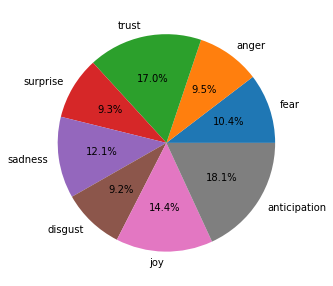

In [ ]:
df_all[basic_emotions].sum(axis=0).plot(
      labels=basic_emotions, 
      label="",
      kind='pie', 
      autopct='%1.1f%%',
      figsize=(5,5)
)
plt.show()

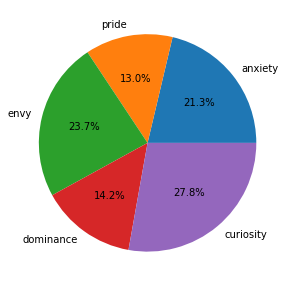

In [ ]:
  df_all[derived_emotions].sum(axis=0).plot(
      labels=derived_emotions, 
      label="",
      kind='pie', 
      autopct='%1.1f%%',
      figsize=(5,5)
      )
  plt.show()

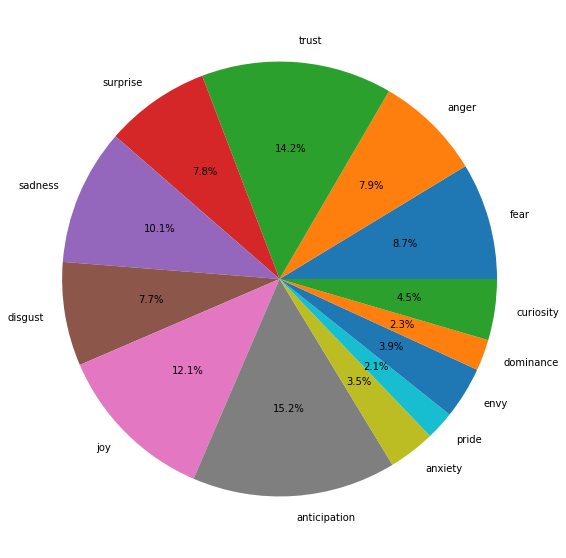

In [ ]:
all_emotions = basic_emotions + derived_emotions  

df_all[all_emotions].sum(axis=0).plot(
      labels=all_emotions, 
      label="",
      kind='pie', 
      autopct='%1.1f%%',
      figsize=(10,10)
      )
plt.show()

In [ ]:
X = df_all.groupby("character").sum()
X.drop('number', axis=1, inplace=True)
#X = X.drop(df.index[0])

In [ ]:
X

,is_character,fear,anger,anticip,trust,surprise,sadness,disgust,joy,anticipation,pride,anxiety,curiosity,envy,dominance
character,,,,,,,,,,,,,,,
ANATOLY,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANDREWS,25,3.0,2.0,0.0,5.0,5.0,3.0,1.0,5.0,7.0,1.0,2.0,3.0,0.0,1.0
BARRETT,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BELL,2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
BODINE,28,3.0,3.0,0.0,1.0,0.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
BRIDE,5,3.0,2.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
BROCK,8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0
BUELL,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAL,94,8.0,11.0,0.0,20.0,11.0,13.0,16.0,23.0,19.0,4.0,2.0,8.0,4.0,4.0


####**Dimensionality Reduction**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_upd = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_upd)
principalDf = pd.DataFrame(data = principalComponents, index = X.index
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.shape

(50, 3)

In [ ]:
principalDf

,principal component 1,principal component 2,principal component 3
character,,,
ANATOLY,-1.763967,0.008966,0.022346
ANDREWS,1.463775,-0.081496,0.799096
BARRETT,-1.770651,0.015458,0.022959
BELL,-1.310114,0.065391,-0.510968
BODINE,-0.439477,0.057157,-0.088936
BRIDE,-0.531750,0.004220,-1.006158
BROCK,-0.824196,0.205589,-0.124321
BUELL,-1.684735,-0.042694,0.053627
CAL,10.213216,2.949442,1.240163


In [ ]:
characters = {
              'ANATOLY':'male',
              'BODINE': 'male',
              'LOVETT': 'male',
              'CAMERAMAN' : 'male',
              'BUELL': 'male',
              'ROSE': 'female',
              'LIZZY': 'female',
              'CAL': 'male',
              'RUTH': 'female',
              'PORTER': 'male',
              'LOVEJOY': 'male',
              'MAN': 'male',
              'OLD ROSE': 'female',
              'JACK': 'male',
              'FABRIZIO': 'male',
              'PUBKEEPER': 'male',
              'MOODY': 'male',
              'ROWE': 'male',
              'TRUDY': 'female',
              'WOMAN': 'female',
              'SMITH': 'male',
              'ISMAY': 'male',
              'ANDREWS': 'male',
              'MOLLY': 'female',
              'TOMMY': 'male',
              'GRACIE': 'male',
              'MASTER AT ARMS': 'male',
              'COLONEL GRACIE': 'male',
              'BROCK': 'male',
              'MARVIN': 'male',
              'STEWARD': 'male',
              'SIR COSMO': 'male',
              'GUGGENHEIM': 'male',
              'BRIDE': 'male',
              'LIGHTOLLER': 'male',
              'FLEET': 'male',
              'PHILLIPS': 'male',
              'EVANS': 'female',
              'LEE': 'female',
              'MURDOCH': 'male',
              'BELL': 'male',
              'BARRETT': 'male',
              'STEWARD BARNES': 'male',
              'HUTCHINSON': 'male',
              'STEWARD #2': 'male',
              'HARTLEY': 'male',
              'LOWE': 'male',
              'HITCHINS': 'male',
              'HUSBAND': 'male',
              'JOUGHIN': 'male',
              'FATHER BYLES': 'male'} 

characters = pd.Series(characters)
characters = pd.DataFrame(data=characters, columns=['target'])

In [ ]:
finalDf = pd.concat([principalDf, characters], axis=1)
finalDf

,principal component 1,principal component 2,principal component 3,target
ANATOLY,-1.763967,0.008966,0.022346,male
ANDREWS,1.463775,-0.081496,0.799096,male
BARRETT,-1.770651,0.015458,0.022959,male
BELL,-1.310114,0.065391,-0.510968,male
BODINE,-0.439477,0.057157,-0.088936,male
BRIDE,-0.531750,0.004220,-1.006158,male
BROCK,-0.824196,0.205589,-0.124321,male
BUELL,-1.684735,-0.042694,0.053627,male
CAL,10.213216,2.949442,1.240163,male
COLONEL GRACIE,-1.303430,0.058899,-0.511581,male


In [ ]:
import plotly.graph_objects as graph_objects

fig = graph_objects.Figure()

for cluster in list(finalDf.target.unique()):
    fig.add_trace(graph_objects.Scatter3d(x = finalDf[finalDf['target'] == cluster]['principal component 1'],
                               y = finalDf[finalDf['target'] == cluster]['principal component 2'],
                               z = finalDf[finalDf['target'] == cluster]['principal component 3'],
                               mode = 'markers', marker=dict(size = 10, line_width = 2),
                               name = 'Cluster ' + str(cluster)))

fig.update_layout(title='Visualization of clusters', width=700, height=500, 
                  autosize = True, showlegend = True,
                  scene = dict(xaxis=dict(title = 'PCA 1'),
                               yaxis=dict(title = 'PCA 2'),
                               zaxis=dict(title = 'PCA 3')))
fig.layout.template = 'plotly_dark'
fig.show()